In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.backend import clear_session

In [11]:
# load data
np_data = np.load("data/dataRS.npy")
# ground truth
noise_output = np_data[:,-1].reshape(len(np_data),1)
input = np_data[:,:-1]

# split data
test_split = 0.33
x_train, x_test, y_train, y_test = train_test_split(input, noise_output, test_size=test_split, random_state=42)

### Enter your tag as unique id for saving

In [12]:
import time
timestr = time.strftime("%d%m%Y")
tag = str("encoderTest"+timestr)

In [13]:
latent_dim = 3
pca = PCA(n_components=latent_dim,)
dataPCA = pca.fit_transform(x_train)
encoderClassical = np.load("data/ENCdata_autoencoder-18032023.npy")
encoderQuantum1 = np.load("data/ENCdata_quantumAutoencoder-18032023.npy")
encoderQuantum2 = np.load("data/ENCdata_quantumAutoencoder2-18032023.npy")
print(dataPCA.shape, encoderClassical.shape, encoderQuantum1.shape, encoderQuantum2.shape)

(1007, 3) (1007, 3) (1007, 3) (1007, 3)


In [14]:
def plot_metrics(history):
    n = len(history.history.keys())//2
    fig,axs = plt.subplots(1,n, figsize=(18,5))

    for i,[key,val] in enumerate(history.history.items()):
        axs[i%n].plot(history.history[key], lw=4, label=key.replace("_", " "))
    
    for ax in axs:
        ax.set_yscale("log")
        ax.set_xlabel("epoch", fontsize=16)
        ax.legend(fontsize=14)

In [15]:
#Create a simple ANN
clear_session()
layer_0 = Input(shape=(3,))
layer_1 = Dense(3, activation="relu")
layer_2 = Dense(1, activation="relu")
ann = Sequential([layer_0, layer_1, layer_2])
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


Epoch 1/500
31/31 [==============================] - 0s 4ms/step - loss: 15648.1338 - mean_absolute_error: 124.8965 - val_loss: 15660.6650 - val_mean_absolute_error: 124.9652
Epoch 2/500
31/31 [==============================] - 0s 2ms/step - loss: 15634.8555 - mean_absolute_error: 124.8433 - val_loss: 15643.8057 - val_mean_absolute_error: 124.8977
Epoch 3/500
31/31 [==============================] - 0s 2ms/step - loss: 15617.4209 - mean_absolute_error: 124.7735 - val_loss: 15625.3848 - val_mean_absolute_error: 124.8239
Epoch 4/500
31/31 [==============================] - 0s 2ms/step - loss: 15598.7725 - mean_absolute_error: 124.6989 - val_loss: 15606.0801 - val_mean_absolute_error: 124.7465
Epoch 5/500
31/31 [==============================] - 0s 2ms/step - loss: 15579.6680 - mean_absolute_error: 124.6225 - val_loss: 15587.0986 - val_mean_absolute_error: 124.6703
Epoch 6/500
31/31 [==============================] - 0s 2ms/step - loss: 15560.6318 - mean_absolute_error: 124.5462 - val_los

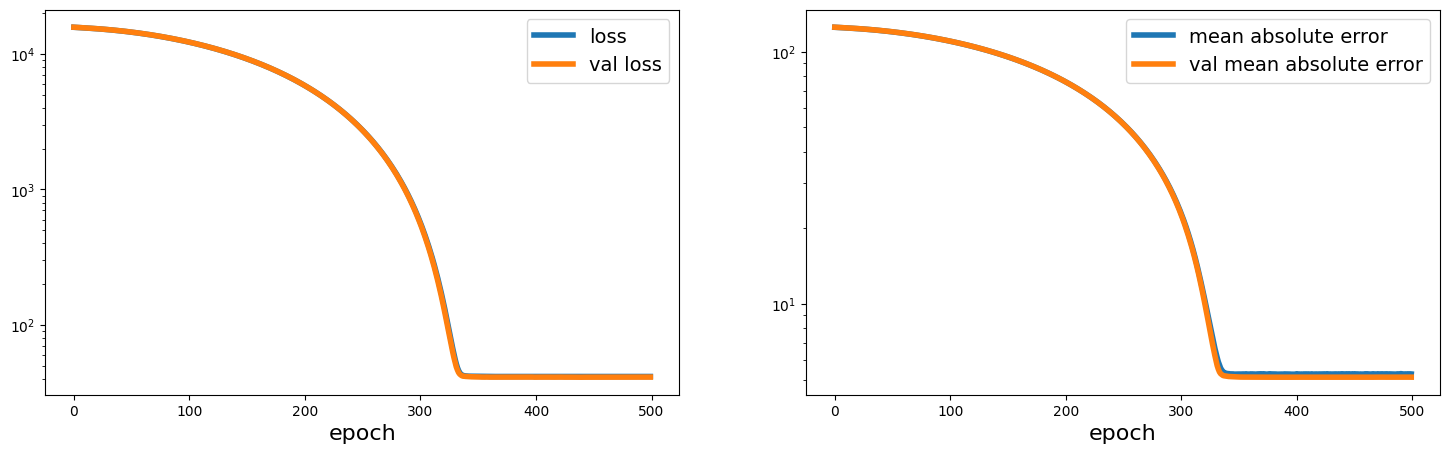

In [16]:
layer_0 = Input(shape=(3,))
layer_1 = Dense(3, activation="relu")
layer_2 = Dense(1, activation="relu")
annPCA = Sequential([layer_0, layer_1, layer_2])
annPCA.compile(optimizer = 'rmsprop', loss='mean_squared_error', metrics=['mean_absolute_error'])
ann_historyPCA = annPCA.fit(dataPCA, y_train, epochs=500, batch_size=25, validation_split=0.25)
plot_metrics(ann_historyPCA)

Epoch 1/500
31/31 [==============================] - 1s 15ms/step - loss: 15570.6201 - mean_absolute_error: 124.5852 - val_loss: 15572.6025 - val_mean_absolute_error: 124.6121
Epoch 2/500
31/31 [==============================] - 0s 2ms/step - loss: 15528.2412 - mean_absolute_error: 124.4152 - val_loss: 15527.1328 - val_mean_absolute_error: 124.4299
Epoch 3/500
31/31 [==============================] - 0s 2ms/step - loss: 15479.5869 - mean_absolute_error: 124.2193 - val_loss: 15475.3223 - val_mean_absolute_error: 124.2217
Epoch 4/500
31/31 [==============================] - 0s 2ms/step - loss: 15426.2646 - mean_absolute_error: 124.0040 - val_loss: 15420.0518 - val_mean_absolute_error: 123.9990
Epoch 5/500
31/31 [==============================] - 0s 2ms/step - loss: 15368.0752 - mean_absolute_error: 123.7688 - val_loss: 15360.3193 - val_mean_absolute_error: 123.7578
Epoch 6/500
31/31 [==============================] - 0s 2ms/step - loss: 15306.0527 - mean_absolute_error: 123.5166 - val_lo

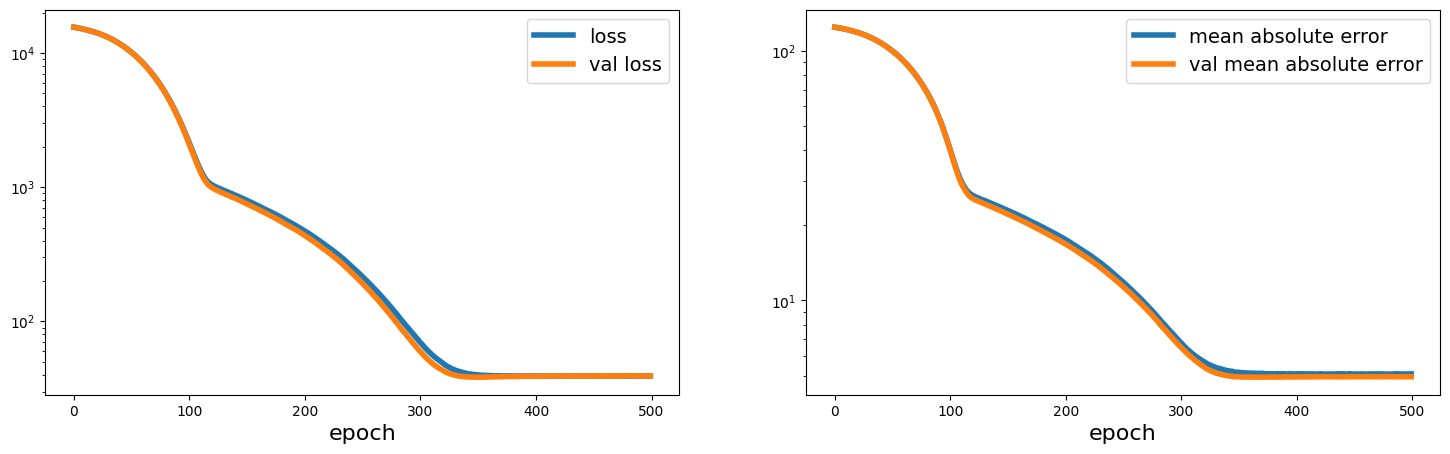

In [17]:
layer_0 = Input(shape=(3,))
layer_1 = Dense(3, activation="relu")
layer_2 = Dense(1, activation="relu")
annAEC = Sequential([layer_0, layer_1, layer_2])
annAEC.compile(optimizer = 'rmsprop', loss='mean_squared_error', metrics=['mean_absolute_error'])
ann_historyAEC = annAEC.fit(encoderClassical, y_train, epochs=500, batch_size=25, validation_split=0.25)
plot_metrics(ann_historyAEC)

Epoch 1/500
31/31 [==============================] - 0s 4ms/step - loss: 15648.3125 - mean_absolute_error: 124.8974 - val_loss: 15661.7080 - val_mean_absolute_error: 124.9699
Epoch 2/500
31/31 [==============================] - 0s 1ms/step - loss: 15638.3877 - mean_absolute_error: 124.8578 - val_loss: 15648.9639 - val_mean_absolute_error: 124.9191
Epoch 3/500
31/31 [==============================] - 0s 1ms/step - loss: 15624.2607 - mean_absolute_error: 124.8014 - val_loss: 15633.4336 - val_mean_absolute_error: 124.8570
Epoch 4/500
31/31 [==============================] - 0s 1ms/step - loss: 15608.1016 - mean_absolute_error: 124.7367 - val_loss: 15617.3252 - val_mean_absolute_error: 124.7926
Epoch 5/500
31/31 [==============================] - 0s 2ms/step - loss: 15591.4395 - mean_absolute_error: 124.6700 - val_loss: 15600.3994 - val_mean_absolute_error: 124.7249
Epoch 6/500
31/31 [==============================] - 0s 2ms/step - loss: 15574.3008 - mean_absolute_error: 124.6014 - val_los

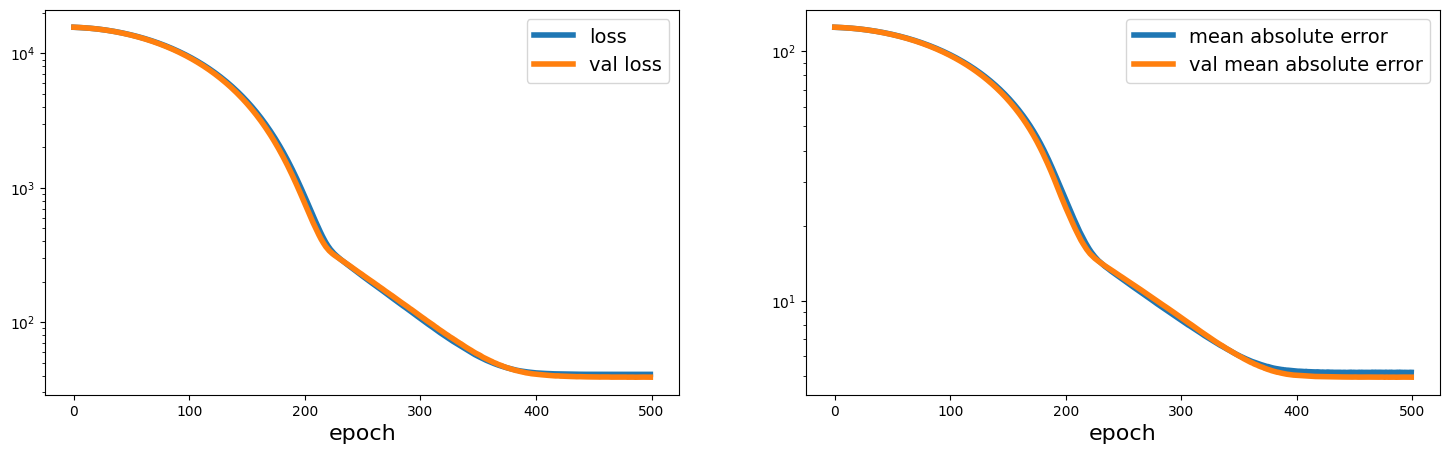

In [22]:
layer_0 = Input(shape=(3,))
layer_1 = Dense(3, activation="relu")
layer_2 = Dense(1, activation="relu")
annAEQ1 = Sequential([layer_0, layer_1, layer_2])
annAEQ1.compile(optimizer = 'rmsprop', loss='mean_squared_error', metrics=['mean_absolute_error'])
ann_historyAEQ1 = annAEQ1.fit(encoderQuantum1, y_train, epochs=500, batch_size=25, validation_split=0.25)
plot_metrics(ann_historyAEQ1)

Epoch 1/500
31/31 [==============================] - 0s 4ms/step - loss: 15583.4805 - mean_absolute_error: 124.6387 - val_loss: 15580.6885 - val_mean_absolute_error: 124.6465
Epoch 2/500
31/31 [==============================] - 0s 1ms/step - loss: 15545.8887 - mean_absolute_error: 124.4879 - val_loss: 15543.9707 - val_mean_absolute_error: 124.4994
Epoch 3/500
31/31 [==============================] - 0s 1ms/step - loss: 15507.7969 - mean_absolute_error: 124.3347 - val_loss: 15504.6172 - val_mean_absolute_error: 124.3412
Epoch 4/500
31/31 [==============================] - 0s 2ms/step - loss: 15467.7803 - mean_absolute_error: 124.1734 - val_loss: 15463.6523 - val_mean_absolute_error: 124.1763
Epoch 5/500
31/31 [==============================] - 0s 2ms/step - loss: 15426.2295 - mean_absolute_error: 124.0062 - val_loss: 15421.1162 - val_mean_absolute_error: 124.0048
Epoch 6/500
31/31 [==============================] - 0s 1ms/step - loss: 15383.1816 - mean_absolute_error: 123.8323 - val_los

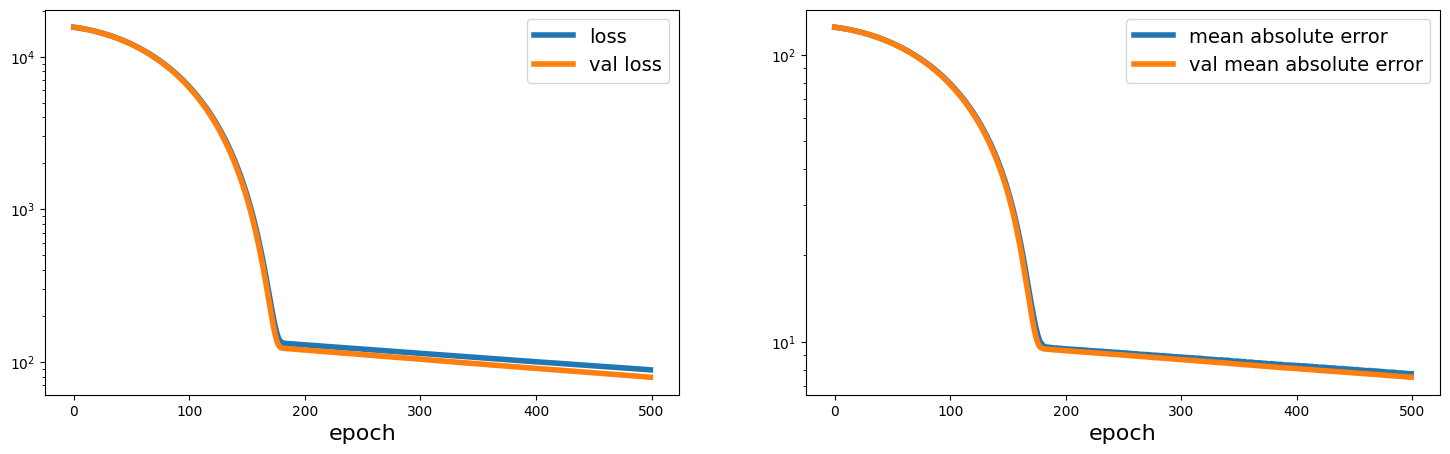

In [19]:
layer_0 = Input(shape=(3,))
layer_1 = Dense(3, activation="relu")
layer_2 = Dense(1, activation="relu")
annAEQ2 = Sequential([layer_0, layer_1, layer_2])
annAEQ2.compile(optimizer = 'rmsprop', loss='mean_squared_error', metrics=['mean_absolute_error'])
ann_historyAEQ2 = annAEQ2.fit(encoderQuantum2, y_train, epochs=500, batch_size=25, validation_split=0.25)
plot_metrics(ann_historyAEQ2)

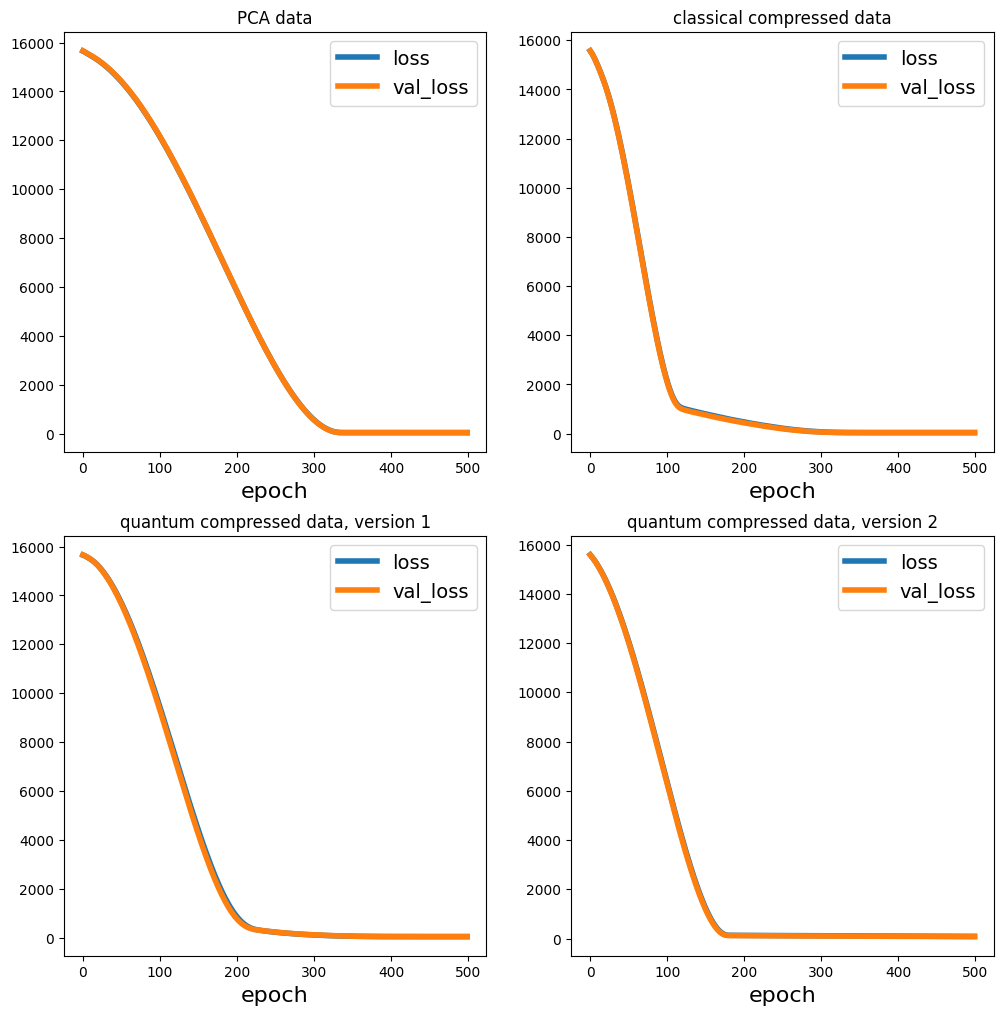

In [26]:
fig,axs = plt.subplots(2,2, figsize=(12, 12))
axs[0,0].plot(ann_historyPCA.history['loss'], lw=4, label='loss')
axs[0,0].plot(ann_historyPCA.history['val_loss'], lw=4, label='val_loss')
axs[0,0].set_xlabel("epoch", fontsize=16)
axs[0,0].set_title("PCA data")
axs[0,0].legend(fontsize=14)
#-------------------------------
axs[0,1].plot(ann_historyAEC.history['loss'], lw=4, label='loss')
axs[0,1].plot(ann_historyAEC.history['val_loss'], lw=4, label='val_loss')
axs[0,1].set_xlabel("epoch", fontsize=16)
axs[0,1].set_title("classical compressed data")
axs[0,1].legend(fontsize=14)
#-------------------------------
axs[1,0].plot(ann_historyAEQ1.history['loss'], lw=4, label='loss')
axs[1,0].plot(ann_historyAEQ1.history['val_loss'], lw=4, label='val_loss')
axs[1,0].set_xlabel("epoch", fontsize=16)
axs[1,0].set_title("quantum compressed data, version 1")
axs[1,0].legend(fontsize=14)
#-------------------------------
axs[1,1].plot(ann_historyAEQ2.history['loss'], lw=4, label='loss')
axs[1,1].plot(ann_historyAEQ2.history['val_loss'], lw=4, label='val_loss')
axs[1,1].set_xlabel("epoch", fontsize=16)
axs[1,1].set_title("quantum compressed data, version 2")
axs[1,1].legend(fontsize=14)

plt.show()
fig.savefig("archive/history-"+tag+".png")

In [27]:
annPCA.save("archive/model-"+tag+"PCA.h5")
annPCA.save_weights("archive/weights-"+tag+"PCA.h5")
config = annPCA.get_config()
np.save("archive/config-"+tag+"PCA.npy", config)
#------------------
annAEC.save("archive/model-"+tag+"AEC.h5")
annAEC.save_weights("archive/weights-"+tag+"AEC.h5")
config = annAEC.get_config()
np.save("archive/config-"+tag+"AEC.npy", config)
#------------------
annAEQ1.save("archive/model-"+tag+"AEQ1.h5")
annAEQ1.save_weights("archive/weights-"+tag+"AEQ1.h5")
config = annAEQ1.get_config()
np.save("archive/config-"+tag+"AEQ1.npy", config)
#------------------
annAEQ2.save("archive/model-"+tag+"AEQ2.h5")
annAEQ2.save_weights("archive/weights-"+tag+"AEQ2.h5")
config = annAEQ2.get_config()
np.save("archive/config-"+tag+"AEQ2.npy", config)